**Topic:  Classification**

**Settings:  Where applicable, use test_size=.30, random_state=4444.  This will permit comparison of results across users.

**Data:**

Challenges 1-10:  congressional votes [Congressional Voting Records Dataset](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)

Challenge 11:     movie data

Challenge 12:     breast cancer surgery [Haberman Survival Dataset](https://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival)


In [1]:
import numpy as np
import pandas as pd

In [2]:
#Read in data
congress_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data',
                 header=None)

In [3]:
#Check a few rows
congress_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


**Challenge 1**

Load the data into a pandas dataframe. Replace 'y's with 1s, 'n's with 0s.

Now, almost every representative has a ?. This represents the absence of a vote (they were absent or some other similar reason). If we dropped all the rows that had a ?, we would throw out most of our data. Instead, we will replace ? with the best guess in the Bayesian sense: in the absence of any other information, we will say that the probability of the representative saying YES is the ratio of others that said YES over the whole votes.

So, convert each ? to this probability (when yes=1 and no=0, this is the mean of the column)

In [4]:
#Replace n, y, and ?
congress_df.replace('n',0,inplace=True)
congress_df.replace('y',1,inplace=True)
congress_df.replace('?',np.nan,inplace=True)

In [5]:
#Check the df
congress_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [6]:
#Check the averages
congress_df.mean()

1     0.442080
2     0.503876
3     0.596698
4     0.417453
5     0.504762
6     0.641509
7     0.567696
8     0.576190
9     0.501211
10    0.504673
11    0.362319
12    0.423267
13    0.509756
14    0.593301
15    0.427518
16    0.812689
dtype: float64

In [7]:
#Fill na with column mean
congress_df.fillna(congress_df.mean(),inplace=True)

In [8]:
#Check replacement looks good
congress_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.362319,1.000000,1.0,1.0,0.0,1.000000
1,republican,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.0,1.0,0.0,0.812689
2,democrat,0.44208,1.0,1.0,0.417453,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,1.0,0.0,0.000000
3,democrat,0.00000,1.0,1.0,0.000000,0.504762,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,0.0,0.0,1.000000
4,democrat,1.00000,1.0,1.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.423267,1.0,1.0,1.0,1.000000


**Challenge 2**

Split the data into a test and training set. Use this function:

```
from sklearn.cross_validation import train_test_split
```


In [9]:
#Train test split
from sklearn.model_selection import train_test_split

#Sep features from target
features = congress_df.iloc[:,1:]
target = congress_df.iloc[:,0]

X_train,X_test,y_train,y_test = train_test_split(features, target, test_size=.30, random_state=4444)

**Challenge 3**

Using scikit.learn's KNN algorithm, train a model that predicts the party (republican/democrat):

```
from sklearn.neighbors import KNeighborsClassifier
```

Try it with a lot of different k values (number of neighbors), from 1 to 20, and on the test set calculate the accuracy (number of correct predictions / number of all predictions) for each k

You can use this to calculate accuracy:

```
from sklearn.metrics import accuracy_score
```

Which k value gives the highest accuracy?


In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Create list of k's and a list to store the accuracy scores
k_range = list(range(1,21))
k_scores = []

#Create a tuple (k, score) for each k, add to list of scores
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score = accuracy_score(y_test, knn.predict(X_test))
    k_scores.append((k,score))

In [11]:
#Sort the list of (k, score) tuples in descending order
k_scores_sorted = sorted(k_scores, key=lambda tup: tup[1],reverse=True)


#Select the most accurate k
k_scores_sorted[0]


(6, 0.9312977099236641)

**Challenge 4**

Make a similar model but with `LogisticRegression` instead, calculate test accuracy.


In [12]:
from sklearn.linear_model import LogisticRegression

#Fit and score Logistic Regression
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_acc = accuracy_score(y_test, lr.predict(X_test))
lr_acc

0.9389312977099237

In [13]:
#Export a prediction v actuals df to use in challenge 8
X_test_pred = np.asarray(lr.predict(X_test))
scoring_df = pd.DataFrame({'prediction':X_test_pred, 'actual': y_test})
pd.to_pickle(scoring_df, 'scoring_df')

**Challenge 5**

Make a bar graph of democrats and republicans. How many of each are there?

Make a very simple predictor that predicts 'democrat' for every incoming example.

Just make a function that takes in an X --an array or matrix with input examples--, and returns an array of the same length as X, where each value is 'democrat'. For example, if X is three rows, your function should return ['democrat','democrat','democrat']. Make a y_predicted vector using this and measure its accuracy.

Do the same with predicting 'republican' all the time and measure its accuracy.

In [14]:
#plotting imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

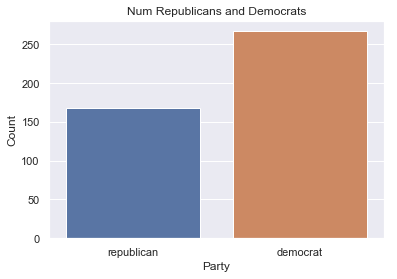

In [15]:
#Plot party counts
sns.countplot(target)
plt.title('Num Republicans and Democrats')
plt.xlabel('Party')
plt.ylabel('Count');

In [16]:
#Create simple predictor
def simple_predictor(X, party):
    return np.full((len(X),1),party)

#Test accuracy for all democrat and all republican
print('All Democrat prediction accuracy: {}'.
      format('% .3f' % accuracy_score(target, simple_predictor(features, 'democrat'))))
print('All Republican prediction accuracy: {}'.
      format('% .3f' % accuracy_score(target, simple_predictor(features, 'republican'))))


All Democrat prediction accuracy:  0.614
All Republican prediction accuracy:  0.386


**Challenge 6**

Plot the accuracies as a function of k. Since k only matters for KNN, your logistic regression accuracy, 'democrat' predictor accuracy and 'republican' predictor accuracy will stay the same over all k, so each of these three will be a horizontal line. But the KNN accuracy will change with k.

In [17]:
#Create list of k's and a list to store the accuracy scores
k_range = list(range(1,21))
k_scores = []

#Create a tuple (k, score) for each k, add to list of scores
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score = accuracy_score(y_test, knn.predict(X_test))
    k_scores.append((k,score))
    
#Get accuracy score for simple Democrat & Republican predictor
dem_acc = accuracy_score(target, simple_predictor(features, 'democrat'))
rep_acc = accuracy_score(target, simple_predictor(features, 'republican'))

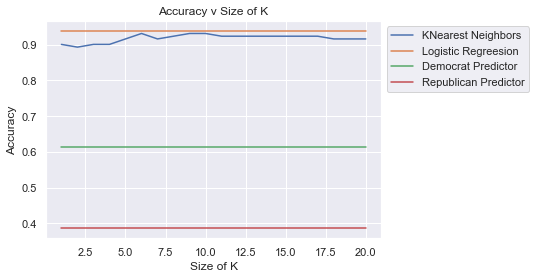

In [18]:
#Plot accuracy vs size of K
plt.plot(k_range,[i[1] for i in k_scores],label='KNearest Neighbors')
plt.plot(k_range,[lr_acc for i in k_scores],label='Logistic Regreesion')
plt.plot(k_range,[dem_acc for i in k_scores],label='Democrat Predictor')
plt.plot(k_range,[rep_acc for i in k_scores],label='Republican Predictor')
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Size of K')
plt.ylabel('Accuracy')
plt.title('Accuracy v Size of K');

**Challenge 7**

Plot a learning curve for the logistic regression model. But instead of going through the painstaking steps of doing it yourself, use this function:

```
from sklearn.learning_curve import learning_curve
```

This will give you the m, training errors and testing errors. All you need to do is plot them. You don't even need to give it separate training/test sets. It will do crossvalidation all by itself. Easy, isn't it? : )
Remember, since it does cross-validation, it doesn't have a single training error or test error per m value. Instead, it has one for each fold (separate partition) of the cross validation. A good idea is to take the mean of these errors from different folds. This gives you a meaningful single number per m. What I mean is that doing something like:

```
train_cv_err = np.mean(train_err, axis=1)
test_cv_err = np.mean(ts_err, axis=1)
```

Before plotting `m` vs `train_cv_err` and `m` vs `test_cv_err`, where `train_err` and `test_err` are the vectors returned by the learning curve function. The `np.mean(...., axis=1)` means take the mean along axis 1 (axis 1 is the columns axis-- for each row, you have a bunch of columns, each corresponding to a cross validation fold, you are averaging these columns for each row).

Draw the learning curve for KNN with the best k value as well.


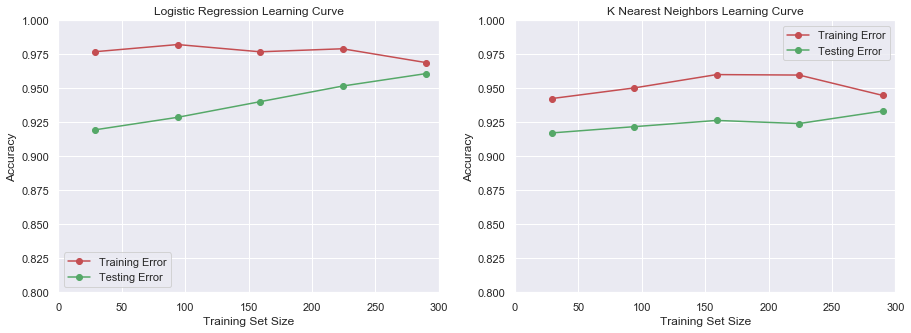

In [19]:
from sklearn.model_selection import learning_curve

#Creat our list of models
models = [('Logistic Regression',LogisticRegression()),
          ('K Nearest Neighbors', KNeighborsClassifier(n_neighbors=6))]

#Set the subplots and figure size
subplots = 1
plt.figure(figsize=(15,5))

#For each model, plot the learning curve
for model in models:
    m, train_cv_err, test_cv_err = learning_curve(model[1],features,target)
    train_cv_err = np.mean(train_cv_err,axis=1)
    test_cv_err = np.mean(test_cv_err,axis=1)

    plt.subplot(1,2,subplots)
    plt.plot(m, train_cv_err, 'o-', color="r",
             label="Training Error")
    plt.plot(m, test_cv_err, 'o-', color="g",
             label="Testing Error")
    plt.legend()
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.ylim(0.80,1)
    plt.xlim(0,300)
    plt.title(model[0] + ' Learning Curve')
    subplots += 1;

**Challenge 8**

This is a preview of many other classification algorithms that we will go over. Scikit.learn has the same interface for all of these, so you can use them exactly the same way as you did LogisticRegression and KNeighborsClassifier. Use each of these to classify your data and print the test accuracy of each:

Gaussian Naive Bayes

```
from sklearn.naive_bayes import GaussianNB
```

SVM (Support Vector Machine) Classifier

```
from sklearn.svm import SVC
```

Decision Tree

```
from sklearn.tree import DecisionTreeClassifier
```

Random Forest

```
from sklearn.ensemble import RandomForestClassifier
```


In [20]:
#Import all models
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Create list of classification algorithms
algorithms = [LogisticRegression(),KNeighborsClassifier(n_neighbors=6),
              GaussianNB(),SVC(),DecisionTreeClassifier(),RandomForestClassifier()]

#Fit and print accuracy for each model
for model in algorithms:
    model.fit(X_train,y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    print(str(model).split('(')[0] + ' Accuracy: {}'.format('% .3f' % acc))

LogisticRegression Accuracy:  0.939
KNeighborsClassifier Accuracy:  0.931
GaussianNB Accuracy:  0.939
SVC Accuracy:  0.954
DecisionTreeClassifier Accuracy:  0.939
RandomForestClassifier Accuracy:  0.947


**Challenge 9**

There is actually a way to do cross validation quickly to get your accuracy results for an algorithm, without separating training and test yourself:

```
from sklearn.cross_validation import cross_val_score
```

Just like the `learning_curve` function, this takes a classifier object, `X` and `Y`. Returns accuracy (or whatever score you prefer by using the _scoring_ keyword argument). Of course, it will return a score for each cross validation fold, so to get the generalized accuracy, you need to take the mean of what it returns.

Use this function to calculate the cross validation score of each of the classifiers you tried before.

In [21]:
from sklearn.model_selection import cross_val_score

#Print mean cross val score for every model
for model in algorithms:
    cvs = cross_val_score(model, features, target, cv=5).mean()
    print(str(model).split('(')[0] + ' Cross Val Score: {}'.format('% .3f' % cvs))

LogisticRegression Cross Val Score:  0.958
KNeighborsClassifier Cross Val Score:  0.933
GaussianNB Cross Val Score:  0.940
SVC Cross Val Score:  0.954
DecisionTreeClassifier Cross Val Score:  0.940
RandomForestClassifier Cross Val Score:  0.952


**Challenge 10**

Instead of 'democrat' or 'republican', can you predict the vote of a representative based on their other votes?

Reload the data from scratch. Convert y-->1, n-->0.

Choose one vote. Build a classifier (logistic regression or KNN), that uses the other votes (do not use the party as a feature) to predict if the vote will be 1 or 0.

Convert each ? to the mode of the column (if a senator has not voted, make their vote 1 if most others voted 1, make it 0 if most others voted 0).

Calculate the cross validation accuracy of your classifier for predicting how each representative will vote on the issue.

In [22]:
#Reload Data
congress_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data',
                 header=None)
#Replace n, y, and ?
congress_df.replace('n',0,inplace=True)
congress_df.replace('y',1,inplace=True)
congress_df.replace('?',np.nan,inplace=True)

In [23]:
#Check number of missing values in each column
congress_df.isnull().sum()

0       0
1      12
2      48
3      11
4      11
5      15
6      11
7      14
8      15
9      22
10      7
11     21
12     31
13     25
14     17
15     28
16    104
dtype: int64

Since we have to fill null values, lets set our target to column ten, the column with the least amount of missing values.

In [24]:
#Sep features from target
#Remove party, set target to column 10
features = pd.concat([congress_df.iloc[:,1:10],congress_df.iloc[:,11:]],axis=1)
target = congress_df.iloc[:,10]

In [25]:
#Check first few rows
features.head()

,1,2,3,4,5,6,7,8,9,11,12,13,14,15,16
0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0,0.0,1.0
1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [26]:
#Check mode of each column
features.mode()

,1,2,3,4,5,6,7,8,9,11,12,13,14,15,16
0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0


In [27]:
#Fill each nan with column mode
cols = list(features.columns)
features[cols]=features[cols].fillna(features.mode().iloc[0])

In [28]:
#Check first few rows again, make sure everything looks okay
features.head()

,1,2,3,4,5,6,7,8,9,11,12,13,14,15,16
0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
2,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0


In [29]:
#Fill target values with mode
target.fillna(target.mode().values[0],inplace=True)

In [30]:
#Cross val score a logistic regression model
lr = LogisticRegression()
cross_val_score(lr,features,target,cv=5).mean()

0.49879772059002203

In [31]:
#Cross val score on KNN
knn = KNeighborsClassifier()
cross_val_score(knn,features,target,cv=5).mean()

0.5055642633228841

**Challenge 11**

Back to movie data! Choose one categoric feature to predict. I chose MPAA Rating, but genre, month, etc. are all decent choices. If you don't have any non-numeric features, you can make two bins out of a numeric one (like "Runtime>100 mins" and "Runtime<=100 mins")

Make a bar graph of how many of each movie there is in the data. For example, with Ratings, show how many G, PG, PG-13, R movies there are, etc. (basically a histogram of your labels).

Predict your outcome variable (labels) using KNN and logistic regression. Calculate their accuracies.

Make a baseline stupid predictor that always predicts the label that is present the most in the data. Calculate its accuracy on a test set.

How much better do KNN and logistic regression do versus the baseline?

What are the coefficients of logistic regression? Which features affect the outcome how?

In [32]:
#Read in movie data
movie_df = pd.read_csv('2013_movies.csv')

In [33]:
movie_df.head(3)

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00


In [34]:
#Inspect the data
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
Title                 100 non-null object
Budget                89 non-null float64
DomesticTotalGross    100 non-null int64
Director              96 non-null object
Rating                100 non-null object
Runtime               100 non-null int64
ReleaseDate           100 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 5.5+ KB


In [35]:
#All movies are from same year, lets try to get release dates by month
movie_df['ReleaseDate'] = pd.to_datetime(movie_df['ReleaseDate'])
movie_df['ReleaseMonth'] = movie_df['ReleaseDate'].apply(lambda x: x.month)

In [36]:
#Fill movies with missing budgets
movie_df.fillna(movie_df['Budget'].mean(),inplace=True)
#There was only one movie rated G and it was causing issues so we drop that one
movie_df.drop(movie_df[movie_df['Rating']=='G'].index,inplace=True)

In [37]:
#Split features and target
X = movie_df[['Budget','DomesticTotalGross','Runtime','ReleaseMonth']]
y = movie_df['Rating']

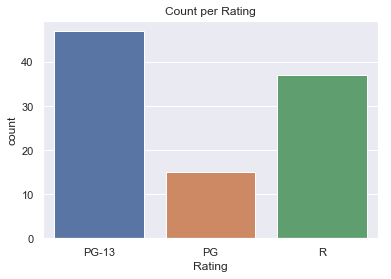

In [38]:
#Plot counting per rating
sns.countplot(y)
plt.title('Count per Rating');

In [39]:
#Fit KNN on data and cross val accuracy
knn = KNeighborsClassifier()

cross_val_score(knn, X, y, scoring='accuracy', cv=5).mean()

0.393483709273183

KNN doesn't do too well. Let's even pick the best K and see it doesn't do well.

In [40]:
#Create list of k's and a list to store the accuracy scores
k_range = list(range(1,21))
k_scores = []

#Create a tuple (k, score) for each k, add to list of scores
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, scoring='accuracy', cv=5).mean()
    k_scores.append((k,score))

In [41]:
#Sort the list of (k, score) tuples in descending order
k_scores_sorted = sorted(k_scores, key=lambda tup: tup[1],reverse=True)

#Select the most accurate k
k = k_scores_sorted[0]

knn = KNeighborsClassifier(n_neighbors=k[0])
cross_val_score(knn, X, y, scoring='accuracy', cv=5).mean()

0.42406015037593986

In [42]:
#Fit and cross val accuracy on our Logistic Regression
lr = LogisticRegression()
cross_val_score(lr, X, y, scoring='accuracy', cv=5).mean()

0.5223057644110275

In [43]:
#Create silly predictor that predicts only one rating
def silly_predictor(X, rating):
    return np.full((len(X),1),rating)       

In [44]:
#Find most popular rating
y.value_counts()

PG-13    47
R        37
PG       15
Name: Rating, dtype: int64

In [45]:
#Predict every movie is PG-13
predictions = silly_predictor(X,'PG-13')

#Calculate that accuracy
accuracy_score(y, predictions)

0.47474747474747475

Only our Logistic Regression model scored slightly higher than the simple predictor. This is likely due to the small sample size and limited features available. 

**Challenge 12**

Now you are a classification master. The representative votes dataset only had 0s and 1s. Let's just swiftly tackle the breast cancer surgery data.

Get it from here: [Haberman Survival Dataset](https://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival)

 * What is the average and standard deviation of the age of all of the patients?
 * What is the average and standard deviation of the age of those patients that survived 5 or more years after surgery?
 * What is the average and standard deviation of the age of those patients who survived fewer than 5 years after surgery?
 * Plot a histogram of the ages side by side with a histogram of the number of axillary nodes.
 * What is the earliest year of surgery in this dataset?
 * What is the most recent year of surgery?
 * Use logistic regression to predict survival after 5 years. How well does your model do?
 * What are the coefficients of logistic regression? Which features affect the outcome how?
 * Draw the learning curve for logistic regression in this case.

In [46]:
#Read in data
survival_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data')


In [47]:
#View a couple of rows
survival_df.head(3)

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1


In [48]:
#Rename columns
column_names = ['age','year_of_op','num_nodes','survival']
survival_df.columns = column_names

 * What is the average and standard deviation of the age of all of the patients?
 * What is the average and standard deviation of the age of those patients that survived 5 or more years after surgery?
 * What is the average and standard deviation of the age of those patients who survived fewer than 5 years after surgery?

In [49]:
#Describe our columns
survival_df.describe()

,age,year_of_op,num_nodes,survival
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [50]:
print('Average age: ' + str(survival_df.age.mean()))
print('Age standard deviation : ' +str(survival_df.age.std()))

Average age: 52.5311475409836
Age standard deviation : 10.744024363993269


In [51]:
print('Average age survived 5+ years: ' + str(survival_df[survival_df['survival']==1].age.mean()))
print('Age standard deviation survived 5+ years: ' +str(survival_df[survival_df['survival']==1].age.std()))

Average age survived 5+ years: 52.11607142857143
Age standard deviation survived 5+ years: 10.93744589077857


In [52]:
print('Average age did not survive 5+ years: ' + str(survival_df[survival_df['survival']==2].age.mean()))
print('Age standard deviation did not survive 5+ years: ' +str(survival_df[survival_df['survival']==2].age.std()))

Average age did not survive 5+ years: 53.67901234567901
Age standard deviation did not survive 5+ years: 10.16713720829741


Plot a histogram of the ages side by side with a histogram of the number of axillary nodes.

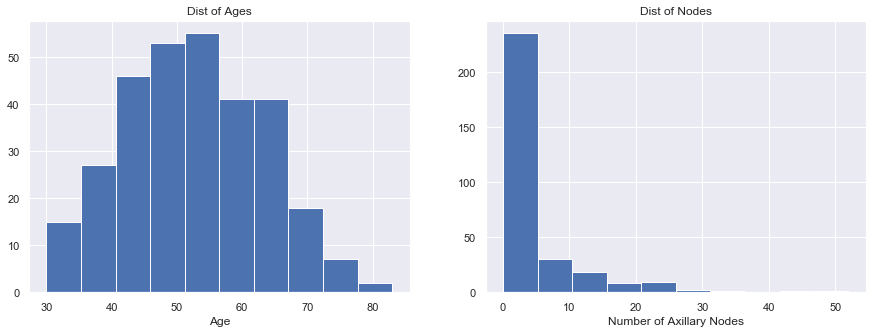

In [53]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(survival_df.age)
plt.title('Dist of Ages')
plt.xlabel('Age')
plt.subplot(1,2,2)
plt.title('Dist of Nodes')
plt.hist(survival_df.num_nodes)
plt.xlabel('Number of Axillary Nodes');

What is the earliest year of surgery in this dataset?

In [54]:
#Year of op column is equal to the actual year of op -1900
survival_df.year_of_op.min() + 1900

1958

What is the most recent year of surgery?

In [55]:
survival_df.year_of_op.max() + 1900

1969

Use logistic regression to predict survival after 5 years. How well does your model do?

In [56]:
#Assign features and targets
X = survival_df[['age','year_of_op','num_nodes']]
y = survival_df['survival']

In [57]:
#Run a quick logistic regression withc ross validation to test our accuracy
lr = LogisticRegression()
cross_val_score(lr,X,y,cv=5,scoring='accuracy').mean()

0.7441812092367355

What are the coefficients of logistic regression? Which features affect the outcome how?

In [58]:
(X.columns,lr.fit(X,y).coef_)

(Index(['age', 'year_of_op', 'num_nodes'], dtype='object'),
 array([[ 0.01798339, -0.03400821,  0.08782192]]))

Increases in age and number of axillary nodes decreases the survival chances, while more recent operations have seen increased odds of survival.

Draw the learning curve for logistic regression in this case.

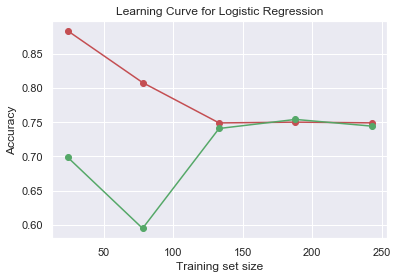

In [59]:
from sklearn.model_selection import learning_curve


train_sizes, train_scores, test_scores = learning_curve(
    lr, X, y, cv=5, train_sizes=np.linspace(.1, 1.0, 5))

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score") 
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")
plt.title('Learning Curve for Logistic Regression')
plt.xlabel('Training set size')
plt.ylabel('Accuracy');